In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm

In [3]:
import cufflinks as cf
from plotly.offline import iplot, plot
import plotly.graph_objects as go
import plotly.express as px
cf.go_offline()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
cars = pd.read_csv('car.txt',
                   header=None,
                   names=[
                       'Price', 'Maintenance Fee', 'Doors', 'Passengers',
                       'Back', 'Security', 'Level'
                   ])
cars.head()

,Price,Maintenance Fee,Doors,Passengers,Back,Security,Level
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
cars.describe()

,Price,Maintenance Fee,Doors,Passengers,Back,Security,Level
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,small,med,unacc
freq,432,432,432,576,576,576,1210


In [7]:
encoders = {}
data = pd.DataFrame([])
for index, cols in cars.iteritems():
    lbe = sp.LabelEncoder()
    encoded = lbe.fit_transform(cols.values)
    data[index] = pd.Series(encoded)
    encoders[index] = lbe

data.head()

,Price,Maintenance Fee,Doors,Passengers,Back,Security,Level
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Cross Validation

In [15]:
X = data.drop('Level', axis=1)
y = data['Level']

model = se.RandomForestClassifier(max_depth=8,
                                  n_estimators=136,
                                  min_samples_split=3)
score = ms.cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(score.mean())

0.8056560021508268


## Validation Curve

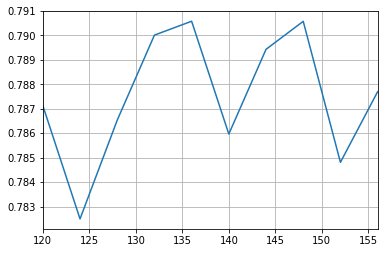

In [9]:
# n_estimators
params = np.arange(120, 160, 4)
train_scores, test_scores = ms.validation_curve(model,
                                                X,
                                                y,
                                                'n_estimators',
                                                params,
                                                cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

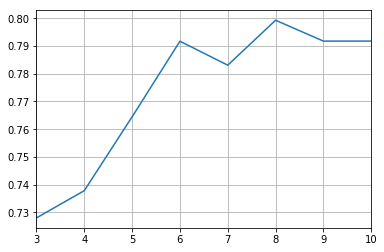

In [10]:
# max_depth
params = np.arange(3, 11)
train_scores, test_scores = ms.validation_curve(model,
                                                X,
                                                y,
                                                'max_depth',
                                                params,
                                                cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

## Learning Curve

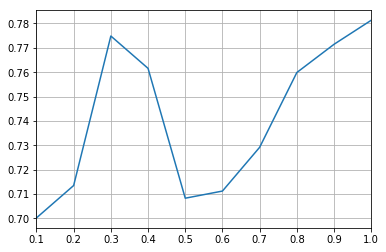

In [23]:
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = ms.learning_curve(model,
                                                 X,
                                                 y,
                                                 train_sizes=params)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

In [17]:
model.fit(X, y)
predictions = model.predict(X)

In [18]:
print(sm.classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       384
           1       1.00      0.38      0.55        69
           2       1.00      1.00      1.00      1210
           3       0.94      1.00      0.97        65

    accuracy                           0.97      1728
   macro avg       0.96      0.84      0.86      1728
weighted avg       0.97      0.97      0.97      1728



In [19]:
print(sm.confusion_matrix(y, predictions))

[[ 381    0    2    1]
 [  40   26    0    3]
 [   6    0 1204    0]
 [   0    0    0   65]]


In [20]:
test_data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
             ['high', 'high', '4', '4', 'med', 'med', 'acc'],
             ['low', 'low', '2', '4', 'small', 'high', 'good'],
             ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

test_data = pd.DataFrame(test_data,
                         columns=[
                             'Price', 'Maintenance Fee', 'Doors', 'Passengers',
                             'Back', 'Security', 'Level'
                         ])
for index, colval in test_data.iteritems():
    lbe = encoders[index]
    encoded = lbe.transform(colval)
    test_data[index] = encoded

X_test = test_data.drop('Level', axis=1)
y_test = test_data['Level']
predictions = model.predict(X_test)
print(encoders['Level'].inverse_transform(y_test))
print(encoders['Level'].inverse_transform(predictions))

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']
